<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/Mnist/FashionMnist_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module import

In [2]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

#데이터 로드 및 전처리

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

#정규화
x_train = x_train / 255.
x_test = x_test /255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [8]:
class_names= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#모델 구성 및 컴파일

In [11]:
def build_model():
  model = Sequential()

  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

model_1 = build_model()
model_1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256

# 모델 학습

In [12]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 10s 27ms/step - loss: 0.6828 - acc: 0.7592 - val_loss: 0.4207 - val_acc: 0.8463
Epoch 2/25
329/329 [==============================] - 9s 26ms/step - loss: 0.3552 - acc: 0.8683 - val_loss: 0.3602 - val_acc: 0.8686
Epoch 3/25
329/329 [==============================] - 9s 26ms/step - loss: 0.2813 - acc: 0.8954 - val_loss: 0.3622 - val_acc: 0.8725
Epoch 4/25
329/329 [==============================] - 8s 26ms/step - loss: 0.2397 - acc: 0.9115 - val_loss: 0.4176 - val_acc: 0.8584
Epoch 5/25
329/329 [==============================] - 8s 26ms/step - loss: 0.2064 - acc: 0.9246 - val_loss: 0.3800 - val_acc: 0.8709
Epoch 6/25
329/329 [==============================] - 9s 26ms/step - loss: 0.1835 - acc: 0.9332 - val_loss: 0.4425 - val_acc: 0.8708
Epoch 7/25
329/329 [==============================] - 8s 26ms/step - loss: 0.1524 - acc: 0.9440 - val_loss: 0.4405 - val_acc: 0.8719
Epoch 8/25
329/329 [==============================] - 8s 26ms/step -

In [13]:
hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

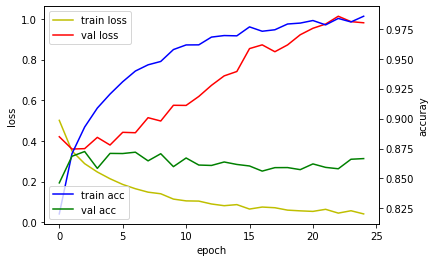

In [14]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_1.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_1.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist_1.history['acc'], 'b', label='train acc')
acc_ax.plot(hist_1.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

**오버피팅**

# 모델 평가

In [15]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0399 - acc: 0.8626


[1.039891004562378, 0.8626000285148621]

# 모델 재학습

In [16]:
def build_model2():
  model = Sequential()

  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

model_2 = build_model2()
model_2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0   

In [17]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 4s 11ms/step - loss: 1.2689 - acc: 0.5305 - val_loss: 0.5574 - val_acc: 0.7962
Epoch 2/25
329/329 [==============================] - 3s 10ms/step - loss: 0.5980 - acc: 0.7857 - val_loss: 0.4764 - val_acc: 0.8243
Epoch 3/25
329/329 [==============================] - 3s 10ms/step - loss: 0.5131 - acc: 0.8153 - val_loss: 0.4399 - val_acc: 0.8364
Epoch 4/25
329/329 [==============================] - 3s 10ms/step - loss: 0.4553 - acc: 0.8354 - val_loss: 0.4060 - val_acc: 0.8504
Epoch 5/25
329/329 [==============================] - 3s 10ms/step - loss: 0.4170 - acc: 0.8521 - val_loss: 0.3785 - val_acc: 0.8613
Epoch 6/25
329/329 [==============================] - 3s 9ms/step - loss: 0.3886 - acc: 0.8593 - val_loss: 0.3701 - val_acc: 0.8656
Epoch 7/25
329/329 [==============================] - 3s 10ms/step - loss: 0.3641 - acc: 0.8690 - val_loss: 0.3577 - val_acc: 0.8673
Epoch 8/25
329/329 [==============================] - 3s 10ms/step - l

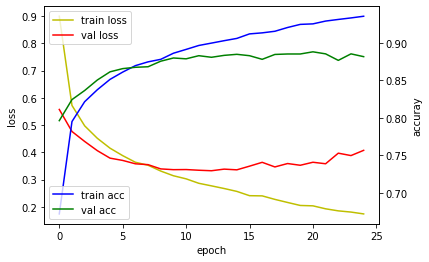

In [18]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist_2.history['acc'], 'b', label='train acc')
acc_ax.plot(hist_2.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#모델 재평가

In [19]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0399 - acc: 0.8626


[1.039891004562378, 0.8626000285148621]

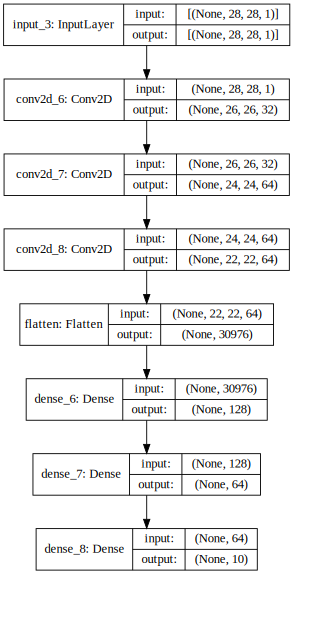

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


SVG(model_to_dot(model_1, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

#모델 성능 높이기 - 많은 레이어 쌓기

In [21]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [22]:
def build_model3():
  model = Sequential()

  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=3 ,activation='relu', padding='same')(input)
  output = Conv2D(filters=64, kernel_size=3 ,activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)


  output = Conv2D(filters=128, kernel_size=3 ,activation='relu', padding='same')(output)
  output = Conv2D(filters=256, kernel_size=3 ,activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(units=256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=100, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  return model

model_3 = build_model3()
model_3.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 256)       2951

# 모델 학습 결과 and 시각화

In [23]:
hist_3 = model_3.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 13s 36ms/step - loss: 1.2548 - acc: 0.5389 - val_loss: 0.4596 - val_acc: 0.8245
Epoch 2/25
329/329 [==============================] - 11s 35ms/step - loss: 0.5281 - acc: 0.8070 - val_loss: 0.3412 - val_acc: 0.8690
Epoch 3/25
329/329 [==============================] - 11s 35ms/step - loss: 0.4221 - acc: 0.8509 - val_loss: 0.3022 - val_acc: 0.8910
Epoch 4/25
329/329 [==============================] - 11s 35ms/step - loss: 0.3626 - acc: 0.8727 - val_loss: 0.2692 - val_acc: 0.9019
Epoch 5/25
329/329 [==============================] - 11s 34ms/step - loss: 0.3342 - acc: 0.8814 - val_loss: 0.2697 - val_acc: 0.9024
Epoch 6/25
329/329 [==============================] - 11s 35ms/step - loss: 0.3122 - acc: 0.8911 - val_loss: 0.2622 - val_acc: 0.9036
Epoch 7/25
329/329 [==============================] - 11s 35ms/step - loss: 0.3015 - acc: 0.8932 - val_loss: 0.2373 - val_acc: 0.9149
Epoch 8/25
329/329 [==============================] - 11s 34ms

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

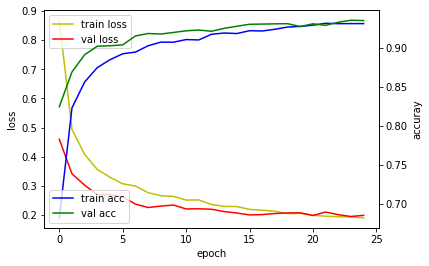

In [24]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_3.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_3.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist_3.history['acc'], 'b', label='train acc')
acc_ax.plot(hist_3.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [25]:
model_3.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2139 - acc: 0.9261


[0.21392697095870972, 0.9261000156402588]

# 모델 성늘 높이기 - 이미지 보강

In [26]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    shear_range=0.6,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True,
    vertical_flip = False
)

In [27]:
augment_size=200

In [28]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [29]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1,28,28,1),
                                 np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

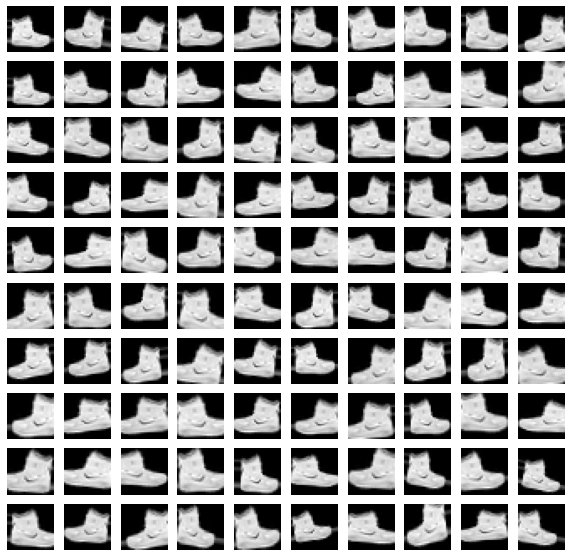

In [30]:
plt.figure(figsize=(10, 10))
for i in range(1,101):
  plt.subplot(10, 10, i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28,28), cmap='gray')

#데이터 추가

In [31]:
image_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.6,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip = True,
    vertical_flip = False
)

In [32]:
augment_size=30000

In [33]:
random_mask=np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [34]:
x_augmented=image_generator.flow(x_augmented,np.zeros(augment_size), 
                                 batch_size=augment_size, shuffle=False).next()[0]

x_train = np.concatenate((x_train,x_augmented))
y_train = np.concatenate((y_train,y_augmented))

print(x_train.shape)

(90000, 28, 28, 1)


#모델 학습 및 결과 시각화

In [35]:
model_4 = build_model3()
model_4.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 256)       2951

In [36]:
hist_4 = model_4.fit(x_train,y_train,
                     epochs= 25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
493/493 [==============================] - 18s 36ms/step - loss: 1.1079 - acc: 0.5969 - val_loss: 0.9112 - val_acc: 0.6660
Epoch 2/25
493/493 [==============================] - 17s 35ms/step - loss: 0.4792 - acc: 0.8304 - val_loss: 0.7242 - val_acc: 0.7362
Epoch 3/25
493/493 [==============================] - 17s 34ms/step - loss: 0.3830 - acc: 0.8667 - val_loss: 0.6633 - val_acc: 0.7564
Epoch 4/25
493/493 [==============================] - 17s 34ms/step - loss: 0.3431 - acc: 0.8801 - val_loss: 0.6130 - val_acc: 0.7799
Epoch 5/25
493/493 [==============================] - 17s 34ms/step - loss: 0.3220 - acc: 0.8864 - val_loss: 0.5732 - val_acc: 0.7854
Epoch 6/25
493/493 [==============================] - 17s 34ms/step - loss: 0.2963 - acc: 0.8953 - val_loss: 0.5620 - val_acc: 0.7926
Epoch 7/25
493/493 [==============================] - 17s 34ms/step - loss: 0.2857 - acc: 0.9026 - val_loss: 0.5617 - val_acc: 0.7922
Epoch 8/25
493/493 [==============================] - 17s 34ms

- 모델 평가값은 떨어졌지만 과적합이 되지 않은 것으로 판단
학습 인자를 이전과 다르게 주면서 학습하면 더 잘나올 것으로 판단

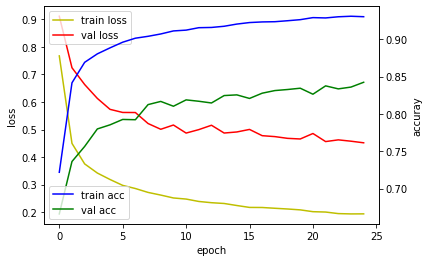

In [37]:
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_4.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_4.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist_4.history['acc'], 'b', label='train acc')
acc_ax.plot(hist_4.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [38]:
model_4.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1962 - acc: 0.9335


[0.19623693823814392, 0.9334999918937683]